In [176]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns

In [177]:
mindset = pd.read_csv("sumOfTechHumTagsInGroupsAndPosts.csv")
user = pd.read_parquet("user.parquet")
user_copy = user.copy()
gender = pd.read_parquet("predicted_genders.parquet")

In [178]:
user = user.drop(columns=['vk_id',"first_name","last_name", "birth_date"])

In [179]:
user["gender"] = gender["predicted_gender"]

In [180]:
users_new = user.merge(mindset, left_on="id", right_on="user_id", how="left")
users_new = users_new.dropna()
train = users_new.copy()
users_new

,id,age,gender,user_id,Unnamed: 0,tech,hum
0,357,19,Female,357,0,53,88
1,358,19,Unknown,358,0,1,0
2,359,19,Unknown,359,0,0,2
3,360,19,Female,360,0,0,0
4,361,19,Unknown,361,0,1,3
...,...,...,...,...,...,...,...
145,502,19,Male,502,0,36,42
146,503,19,Female,503,0,18,44
147,504,19,Male,504,0,109,134
148,505,19,Male,505,0,150,471


In [181]:
#users_new["gender"] = LabelEncoder().fit_transform(users_new["gender"])

In [182]:
df_final = pd.get_dummies(users_new, columns=['gender'])
new_columns = ['age_14.0', 'age_15.0', 'age_16.0', 'age_17.0', 'age_18.0']

# Присваиваем значение 0 для всех новых столбцов
for col in new_columns:
    df_final[col] = False

df_final2 = pd.get_dummies(df_final, columns=['age'])

In [183]:
users_new = df_final2.copy()
users_new

,id,user_id,Unnamed: 0,tech,hum,gender_Female,gender_Male,gender_Unknown,age_14.0,age_15.0,age_16.0,age_17.0,age_18.0,age_19
0,357,357,0,53,88,True,False,False,False,False,False,False,False,True
1,358,358,0,1,0,False,False,True,False,False,False,False,False,True
2,359,359,0,0,2,False,False,True,False,False,False,False,False,True
3,360,360,0,0,0,True,False,False,False,False,False,False,False,True
4,361,361,0,1,3,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,502,502,0,36,42,False,True,False,False,False,False,False,False,True
146,503,503,0,18,44,True,False,False,False,False,False,False,False,True
147,504,504,0,109,134,False,True,False,False,False,False,False,False,True
148,505,505,0,150,471,False,True,False,False,False,False,False,False,True


In [184]:

users_new.columns

Index(['id', 'user_id', 'Unnamed: 0', 'tech', 'hum', 'gender_Female',
       'gender_Male', 'gender_Unknown', 'age_14.0', 'age_15.0', 'age_16.0',
       'age_17.0', 'age_18.0', 'age_19'],
      dtype='object')

In [185]:
users_new

,id,user_id,Unnamed: 0,tech,hum,gender_Female,gender_Male,gender_Unknown,age_14.0,age_15.0,age_16.0,age_17.0,age_18.0,age_19
0,357,357,0,53,88,True,False,False,False,False,False,False,False,True
1,358,358,0,1,0,False,False,True,False,False,False,False,False,True
2,359,359,0,0,2,False,False,True,False,False,False,False,False,True
3,360,360,0,0,0,True,False,False,False,False,False,False,False,True
4,361,361,0,1,3,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,502,502,0,36,42,False,True,False,False,False,False,False,False,True
146,503,503,0,18,44,True,False,False,False,False,False,False,False,True
147,504,504,0,109,134,False,True,False,False,False,False,False,False,True
148,505,505,0,150,471,False,True,False,False,False,False,False,False,True


In [187]:
users_new = users_new.drop(["id","user_id"], axis=1)

In [188]:
users_new.to_parquet("feature_target2.parquet",index=False)

In [151]:
from sklearn.preprocessing import StandardScaler
import numpy as np



users_new["tech"] = users_new["tech"].replace(0, np.nan).apply(lambda x: np.log1p(x))
users_new["hum"] = users_new["hum"].replace(0, np.nan).apply(lambda x: np.log1p(x))
users_new.fillna(0, inplace=True)

# Отдельные скейлеры для каждого столбца
scaler_tech = StandardScaler()
scaler_hum = StandardScaler()

# Стандартизуем каждый столбец по отдельности
users_new['tech'] = scaler_tech.fit_transform(users_new[['tech']])
users_new['hum'] = scaler_hum.fit_transform(users_new[['hum']])

users_new

,tech,hum,gender_Female,gender_Male,gender_Unknown,age_14.0,age_15.0,age_16.0,age_17.0,age_18.0,age_19.0
1,-0.690452,-1.293054,True,False,False,False,False,False,True,False,False
2,-0.287177,-0.060919,True,False,False,False,False,False,True,False,False
3,0.540887,0.593215,True,False,False,False,False,False,True,False,False
4,0.724139,0.868852,True,False,False,False,False,False,True,False,False
5,1.026868,1.619474,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
27235,0.359578,0.593215,False,True,False,False,False,False,False,False,True
27236,-0.095714,0.301029,False,True,False,False,False,False,False,False,True
27237,1.523439,1.140299,False,True,False,False,False,False,False,False,True
27238,1.250198,1.003449,False,True,False,False,False,False,False,False,True


In [152]:

# Вычисляем разность после стандартизации
users_new['diff'] = (users_new['tech'] - users_new['hum'])*10

users_new = users_new.drop("tech", axis=1)
users_new = users_new.drop("hum", axis=1)
users_new

,tech,hum,gender_Female,gender_Male,gender_Unknown,age_14.0,age_15.0,age_16.0,age_17.0,age_18.0,age_19.0,diff
1,-0.690452,-1.293054,True,False,False,False,False,False,True,False,False,6.026012
2,-0.287177,-0.060919,True,False,False,False,False,False,True,False,False,-2.262583
3,0.540887,0.593215,True,False,False,False,False,False,True,False,False,-0.523288
4,0.724139,0.868852,True,False,False,False,False,False,True,False,False,-1.447135
5,1.026868,1.619474,True,False,False,False,False,False,True,False,False,-5.926057
...,...,...,...,...,...,...,...,...,...,...,...,...
27235,0.359578,0.593215,False,True,False,False,False,False,False,False,True,-2.336373
27236,-0.095714,0.301029,False,True,False,False,False,False,False,False,True,-3.967431
27237,1.523439,1.140299,False,True,False,False,False,False,False,False,True,3.831406
27238,1.250198,1.003449,False,True,False,False,False,False,False,False,True,2.467493


In [154]:
users_new

,gender_Female,gender_Male,gender_Unknown,age_14.0,age_15.0,age_16.0,age_17.0,age_18.0,age_19.0,diff
1,True,False,False,False,False,False,True,False,False,6.026012
2,True,False,False,False,False,False,True,False,False,-2.262583
3,True,False,False,False,False,False,True,False,False,-0.523288
4,True,False,False,False,False,False,True,False,False,-1.447135
5,True,False,False,False,False,False,True,False,False,-5.926057
...,...,...,...,...,...,...,...,...,...,...
27235,False,True,False,False,False,False,False,False,True,-2.336373
27236,False,True,False,False,False,False,False,False,True,-3.967431
27237,False,True,False,False,False,False,False,False,True,3.831406
27238,False,True,False,False,False,False,False,False,True,2.467493


<Axes: >

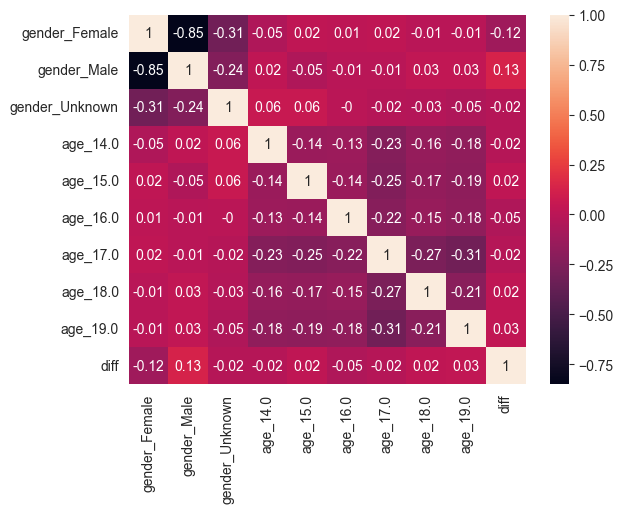

In [155]:
import seaborn as sns
sns.heatmap(round(users_new.corr(), 2), annot=True)

кмин база

In [156]:
# Применение KMeans для кластеризации на 2 кластера
kmeans = KMeans(n_clusters=2, random_state=42)
users_new['cluster'] = kmeans.fit_predict(users_new)

# Добавление целевой переменной на основе кластера (0 - экстраверт, 1 - интроверт)
train['target'] = users_new['cluster'].apply(lambda x: 0 if x == 0 else 1)
train

,id,age,gender,user_id,tech,hum,target
1,2,17.0,Female,2.0,4.0,1.0,1
2,3,17.0,Female,3.0,7.0,8.0,0
3,4,17.0,Female,4.0,20.0,19.0,0
4,5,17.0,Female,5.0,25.0,27.0,0
5,6,17.0,Female,6.0,36.0,69.0,0
...,...,...,...,...,...,...,...
27235,99767,19.0,Male,99767.0,16.0,19.0,0
27236,99768,19.0,Male,99768.0,9.0,13.0,0
27237,99769,19.0,Male,99769.0,65.0,38.0,1
27238,99770,19.0,Male,99770.0,47.0,32.0,1


In [157]:
users_new.to_parquet("train2.parquet", index=False)

In [158]:
train[train["target"] == 0]

,id,age,gender,user_id,tech,hum,target
2,3,17.0,Female,3.0,7.0,8.0,0
3,4,17.0,Female,4.0,20.0,19.0,0
4,5,17.0,Female,5.0,25.0,27.0,0
5,6,17.0,Female,6.0,36.0,69.0,0
8,9,17.0,Female,9.0,10.0,15.0,0
...,...,...,...,...,...,...,...
27222,99754,19.0,Female,99754.0,4.0,7.0,0
27225,99757,19.0,Female,99757.0,1.0,7.0,0
27229,99761,19.0,Female,99761.0,0.0,0.0,0
27235,99767,19.0,Male,99767.0,16.0,19.0,0


In [159]:
users_new

,gender_Female,gender_Male,gender_Unknown,age_14.0,age_15.0,age_16.0,age_17.0,age_18.0,age_19.0,diff,cluster
1,True,False,False,False,False,False,True,False,False,6.026012,1
2,True,False,False,False,False,False,True,False,False,-2.262583,0
3,True,False,False,False,False,False,True,False,False,-0.523288,0
4,True,False,False,False,False,False,True,False,False,-1.447135,0
5,True,False,False,False,False,False,True,False,False,-5.926057,0
...,...,...,...,...,...,...,...,...,...,...,...
27235,False,True,False,False,False,False,False,False,True,-2.336373,0
27236,False,True,False,False,False,False,False,False,True,-3.967431,0
27237,False,True,False,False,False,False,False,False,True,3.831406,1
27238,False,True,False,False,False,False,False,False,True,2.467493,1


C:\Users\hedge\DataspellProjects\ecup\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


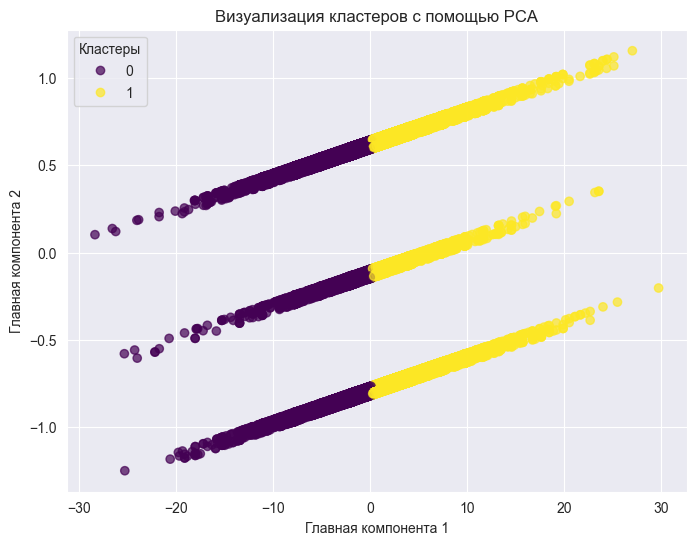

In [160]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Применение PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(users_new.drop("cluster", axis=1))
principal_df = pd.DataFrame(data = pca_result, columns=["PC1","PC2"])
principal_df["cluster"] = kmeans.labels_

# Получение центроидов PCA пространства
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Визуализация кластеров и центроидов
plt.figure(figsize=(8, 6))
scatter = plt.scatter(principal_df['PC1'], principal_df['PC2'],
                      c=principal_df['cluster'], cmap='viridis', alpha=0.7)

plt.title('Визуализация кластеров с помощью PCA')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.legend(*scatter.legend_elements(), title='Кластеры')
plt.grid(True)
plt.show()

In [123]:
import numpy as np

# Поиск случайного пользователя из каждого кластера (ближайшего к центроиду)
centroids = kmeans.cluster_centers_  # Исключаем последний столбец, если он лишний
for cluster_idx in range(2):
    cluster_data = users_new[users_new['cluster'] == cluster_idx]
    centroid = centroids[cluster_idx]
    distances = np.linalg.norm(cluster_data.drop(columns=['cluster']).values - centroid, axis=1)
    closest_user_index = distances.argmin()
    closest_user = cluster_data.iloc[closest_user_index]
    print(f"Cluster {cluster_idx} - Closest User:\n{closest_user}\n")

TypeError: loop of ufunc does not support argument 0 of type float which has no callable sqrt method

In [195]:
test =pd.read_parquet("feature_target2.parquet")
test

,Unnamed: 0,tech,hum,gender_Female,gender_Male,gender_Unknown,age_14.0,age_15.0,age_16.0,age_17.0,age_18.0,age_19
0,0,53,88,True,False,False,False,False,False,False,False,True
1,0,1,0,False,False,True,False,False,False,False,False,True
2,0,0,2,False,False,True,False,False,False,False,False,True
3,0,0,0,True,False,False,False,False,False,False,False,True
4,0,1,3,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
145,0,36,42,False,True,False,False,False,False,False,False,True
146,0,18,44,True,False,False,False,False,False,False,False,True
147,0,109,134,False,True,False,False,False,False,False,False,True
148,0,150,471,False,True,False,False,False,False,False,False,True


In [196]:
import numpy as np

test["tech"] = test["tech"].replace(0, np.nan).apply(lambda x: np.log1p(x))
test["hum"] = test["hum"].replace(0, np.nan).apply(lambda x: np.log1p(x))
test.fillna(0, inplace=True)

# Стандартизуем каждый столбец по отдельности
test['tech'] = scaler_tech.fit_transform(test[['tech']])
test['hum'] = scaler_hum.fit_transform(test[['hum']])

# Вычисляем разность после стандартизации
test['diff'] = (test['tech'] - test['hum'])*10

test = test.drop("tech", axis=1)
test = test.drop("hum", axis=1)

test.rename(columns={'age_19': 'age_19.0'}, inplace=True)

test = test.drop("Unnamed: 0",axis=1)
test

,gender_Female,gender_Male,gender_Unknown,age_14.0,age_15.0,age_16.0,age_17.0,age_18.0,age_19.0,diff
0,True,False,False,False,False,False,False,False,True,1.941556
1,False,False,True,False,False,False,False,False,True,4.842325
2,False,False,True,False,False,False,False,False,True,-10.659606
3,True,False,False,False,False,False,False,False,True,-1.993844
4,False,False,True,False,False,False,False,False,True,-6.092648
...,...,...,...,...,...,...,...,...,...,...
145,False,True,False,False,False,False,False,False,True,3.950832
146,True,False,False,False,False,False,False,False,True,-2.980925
147,False,True,False,False,False,False,False,False,True,5.672286
148,False,True,False,False,False,False,False,False,True,-1.076615


In [197]:
# Делаем предсказания для нового датасета на обученной модели KMeans
predicted_clusters = kmeans.predict(test)

# Добавляем результат предсказаний к новому датасету
test['predicted_cluster'] = predicted_clusters
user_copy['predicted_cluster'] = predicted_clusters

In [200]:
test

,gender_Female,gender_Male,gender_Unknown,age_14.0,age_15.0,age_16.0,age_17.0,age_18.0,age_19.0,diff,predicted_cluster
0,True,False,False,False,False,False,False,False,True,1.941556,1
1,False,False,True,False,False,False,False,False,True,4.842325,1
2,False,False,True,False,False,False,False,False,True,-10.659606,0
3,True,False,False,False,False,False,False,False,True,-1.993844,0
4,False,False,True,False,False,False,False,False,True,-6.092648,0
...,...,...,...,...,...,...,...,...,...,...,...
145,False,True,False,False,False,False,False,False,True,3.950832,1
146,True,False,False,False,False,False,False,False,True,-2.980925,0
147,False,True,False,False,False,False,False,False,True,5.672286,1
148,False,True,False,False,False,False,False,False,True,-1.076615,0


In [201]:
user_copy["predicted_cluster"] = user_copy["predicted_cluster"].apply(lambda x: "Ч" if x == 0 else "А")
user_copy

,id,vk_id,first_name,last_name,birth_date,age,predicted_cluster
0,357,447989889,Арина,Анурьева,1.2.2005,19,А
1,358,531789659,Xxx,Xxx,1.2.2005,19,А
2,359,310682547,Красный,Луч,1.2.2005,19,Ч
3,360,533102471,Wanny,Laemsan,1.2.2005,19,Ч
4,361,563215118,Channel-Myanmar,Movies,1.2.2005,19,Ч
...,...,...,...,...,...,...,...
145,502,474922593,Костя,Вишняков,1.2.2005,19,А
146,503,312572160,Саша,Москвичёва,1.2.2005,19,Ч
147,504,392523496,Омар,Магомедов,1.2.2005,19,А
148,505,442738014,Константин,Савчук,1.2.2005,19,Ч


In [202]:
user_copy

,id,vk_id,first_name,last_name,birth_date,age,predicted_cluster
0,357,447989889,Арина,Анурьева,1.2.2005,19,А
1,358,531789659,Xxx,Xxx,1.2.2005,19,А
2,359,310682547,Красный,Луч,1.2.2005,19,Ч
3,360,533102471,Wanny,Laemsan,1.2.2005,19,Ч
4,361,563215118,Channel-Myanmar,Movies,1.2.2005,19,Ч
...,...,...,...,...,...,...,...
145,502,474922593,Костя,Вишняков,1.2.2005,19,А
146,503,312572160,Саша,Москвичёва,1.2.2005,19,Ч
147,504,392523496,Омар,Магомедов,1.2.2005,19,А
148,505,442738014,Константин,Савчук,1.2.2005,19,Ч


In [205]:
test_predict2 = pd.DataFrame()
test_predict2["vk_id"] = user_copy["vk_id"]
test_predict2["target2"] = user_copy["predicted_cluster"]
test_predict2

,vk_id,target2
0,447989889,А
1,531789659,А
2,310682547,Ч
3,533102471,Ч
4,563215118,Ч
...,...,...
145,474922593,А
146,312572160,Ч
147,392523496,А
148,442738014,Ч


In [206]:
test_predict2.to_csv("test_predict2.csv", index=False)